# Data Collection

In [1]:
import pandas as pd
import numpy as np

# Data Wrangling 

In [2]:
billboard = pd.read_csv('../data/hot100.csv')
billboard = billboard[billboard.get('Date') > '2022-02-01']
billboard

,Date,Song,Artist,Rank,Last Week,Peak Position,Weeks in Charts,Image URL
331087,2022-02-02,We Don't Talk About Bruno,Carolina Gaitan| Mauro Castillo| Adassa| Rhenz...,1,2,1,5,https://charts-static.billboard.com/img/2021/1...
331088,2022-02-02,Easy On Me,Adele,2,1,1,16,https://charts-static.billboard.com/img/2021/1...
331089,2022-02-02,Heat Waves,Glass Animals,3,3,3,54,https://charts-static.billboard.com/img/2020/0...
331090,2022-02-02,Stay,The Kid LAROI & Justin Bieber,4,4,1,29,https://charts-static.billboard.com/img/2021/0...
331091,2022-02-02,Super Gremlin,Kodak Black,5,5,5,12,https://charts-static.billboard.com/img/2016/0...
...,...,...,...,...,...,...,...,...
342082,2024-03-06,Let's Go,Key Glock,96,96,1,-,https://charts-static.billboard.com/img/2023/1...
342083,2024-03-06,Back To Me,¥$: Kanye West & Ty Dolla $ign,97,59,26,3,https://charts-static.billboard.com/img/2003/0...
342084,2024-03-06,Prove It,21 Savage & Summer Walker,98,43,6,-,https://charts-static.billboard.com/img/2016/0...
342085,2024-03-06,Easy,LE SSERAFIM,99,99,1,-,https://charts-static.billboard.com/img/2024/0...


In [3]:
tokchart = pd.read_csv('../data/tokchart.csv')
tokchart

,date,song,artist,rank,weekly_videos,image_url
0,2022-02-13,Ginseng Strip 2002,Yung Lean,1,646K,https://tokchart.com/img/6997999797663714054/600
1,2022-02-13,Ela Já Tá Louca,Nico Mejia ☆,2,394K,https://tokchart.com/img/7055778830786890501/600
2,2022-02-13,Paro Paro G,djsandyremix,3,360K,https://tokchart.com/img/7055495406725106458/600
3,2022-02-13,Ela Já Tá Louca,Anderson Neiff & John Johnis,4,340K,https://tokchart.com/img/7057270407434406661/600
4,2022-02-13,NaN,NaN,5,209K,https://tokchart.com/img/7012690693009312517/600
...,...,...,...,...,...,...
955,2024-03-10,Tshwala Bami Yuppe X TitoM X S.N.E,Yuppe,6,81K,https://tokchart.com/img/7325020516120529670/600
956,2024-03-10,Cute,Aurel Surya Lie,7,63K,https://tokchart.com/img/7136445672676411393/600
957,2024-03-10,Beautiful Things,Benson Boone,8,56K,https://tokchart.com/img/7308548149097450283/600
958,2024-03-10,GATA ONLY,FloyyMenor,9,52K,https://tokchart.com/img/7328723326167369729/600


In [4]:
billboard = (billboard.assign(
    song = billboard.get('Song').str.lower().astype(str),
    rank = billboard.get('Rank'),
    year = pd.to_datetime(billboard.get('Date')).dt.year,
    month = pd.to_datetime(billboard.get('Date')).dt.month,
    week = pd.to_datetime(billboard.get('Date')).dt.isocalendar().week
    ).get(['song', 'rank', 'year', 'month', 'week']))
billboard

,song,rank,year,month,week
331087,we don't talk about bruno,1,2022,2,5
331088,easy on me,2,2022,2,5
331089,heat waves,3,2022,2,5
331090,stay,4,2022,2,5
331091,super gremlin,5,2022,2,5
...,...,...,...,...,...
342082,let's go,96,2024,3,10
342083,back to me,97,2024,3,10
342084,prove it,98,2024,3,10
342085,easy,99,2024,3,10


In [5]:
tokchart = (tokchart.assign(
    song = tokchart.get('song').str.lower().astype(str),
    year = pd.to_datetime(tokchart.get('date')).dt.year,
    month = pd.to_datetime(tokchart.get('date')).dt.month,
    week = pd.to_datetime(tokchart.get('date')).dt.isocalendar().week
    ).get(['song', 'rank', 'year', 'month', 'week']))
tokchart

,song,rank,year,month,week
0,ginseng strip 2002,1,2022,2,6
1,ela já tá louca,2,2022,2,6
2,paro paro g,3,2022,2,6
3,ela já tá louca,4,2022,2,6
4,nan,5,2022,2,6
...,...,...,...,...,...
955,tshwala bami yuppe x titom x s.n.e,6,2024,3,10
956,cute,7,2024,3,10
957,beautiful things,8,2024,3,10
958,gata only,9,2024,3,10


In [6]:
intersecting_songs = list(np.intersect1d(billboard.get('song').astype(str).str.lower(), tokchart.get('song').astype(str).str.lower()))
len(intersecting_songs)

48

# Descriptive and Exploratory Data Analysis

In [7]:
num_tokchart = len(tokchart.get('song').drop_duplicates())
num_billboard = len(billboard.get('song').drop_duplicates())
print(f'Pct billboard on tokchart: {len(intersecting_songs) / num_tokchart}, Pct tokchart on billboard: {len(intersecting_songs) / num_billboard}')

Pct billboard on tokchart: 0.14035087719298245, Pct tokchart on billboard: 0.03443328550932568


# Data Visualization

/Users/cartertran/dev/tiktok_billboard_virality/venv/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


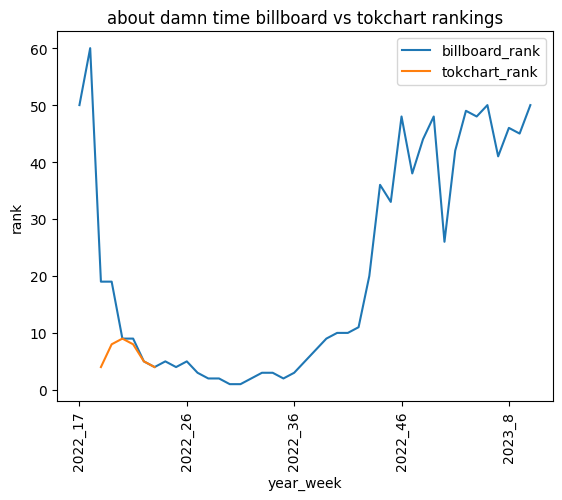

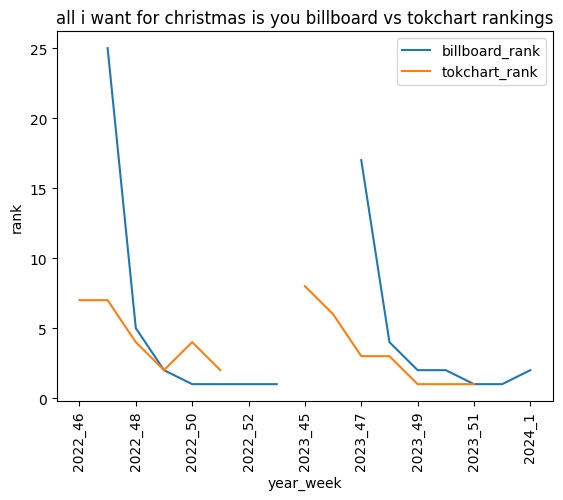

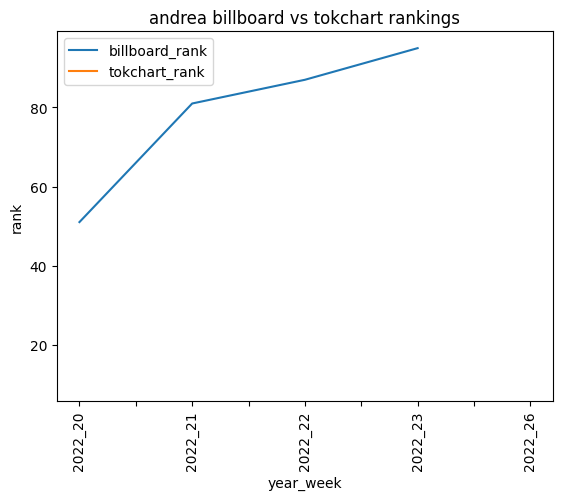

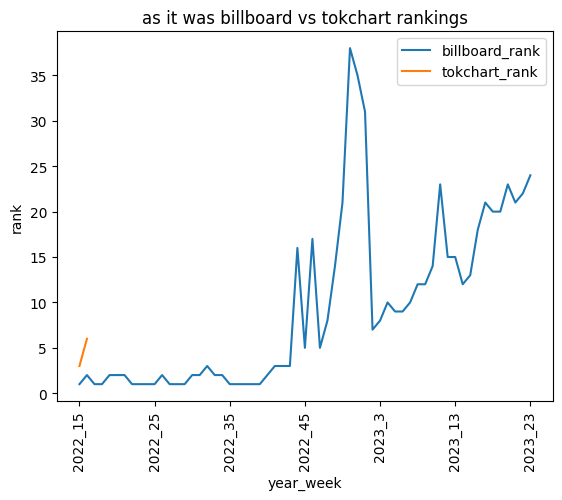

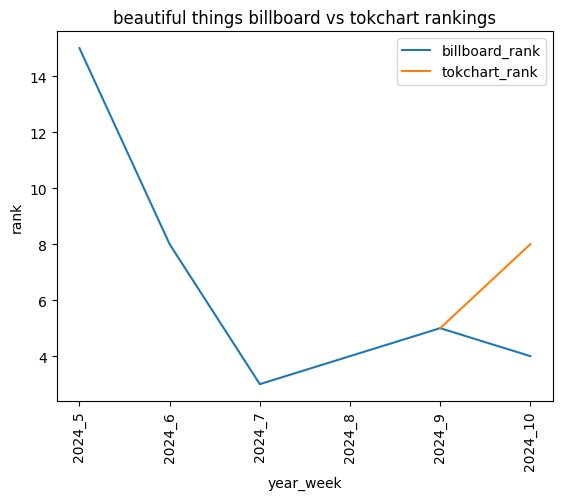

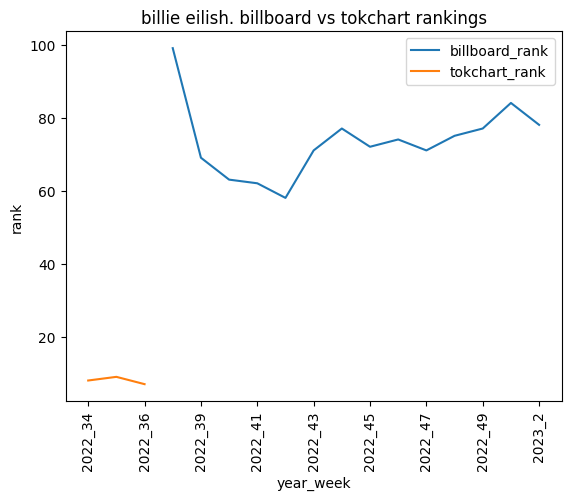

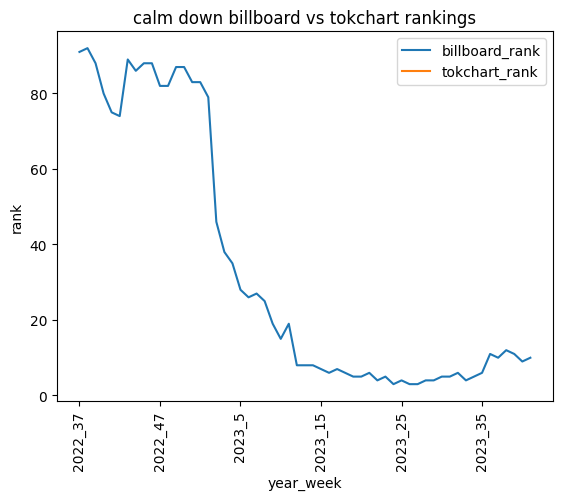

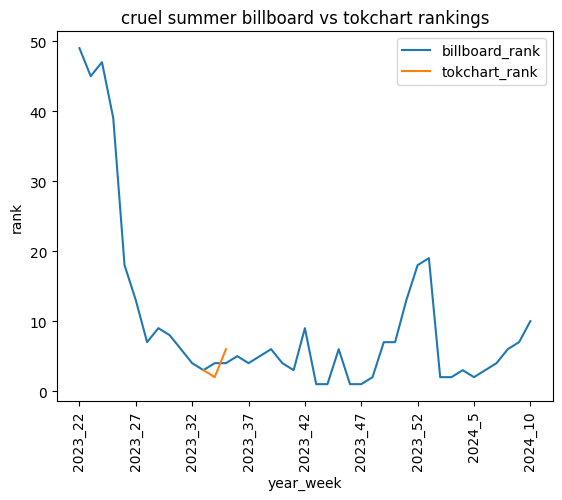

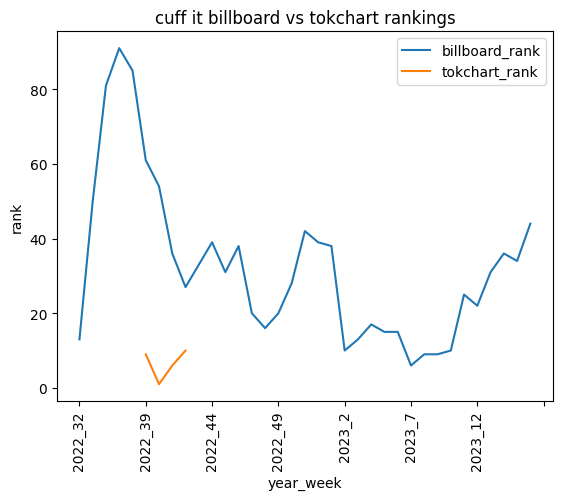

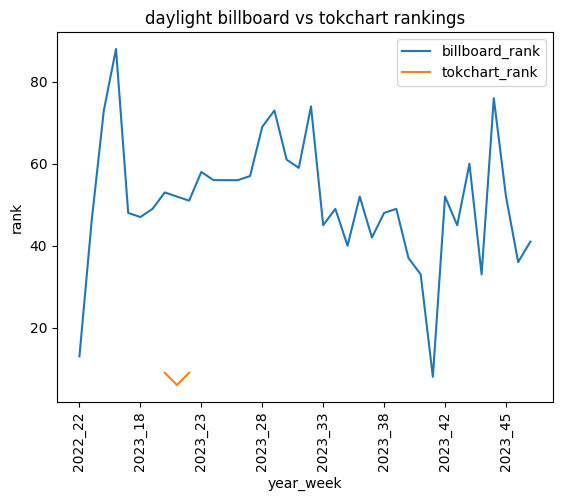

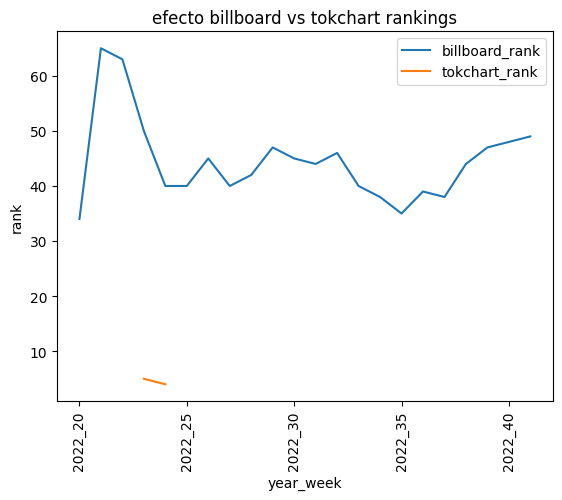

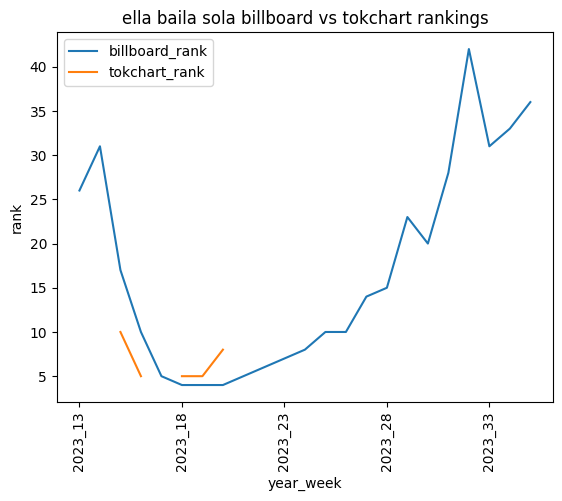

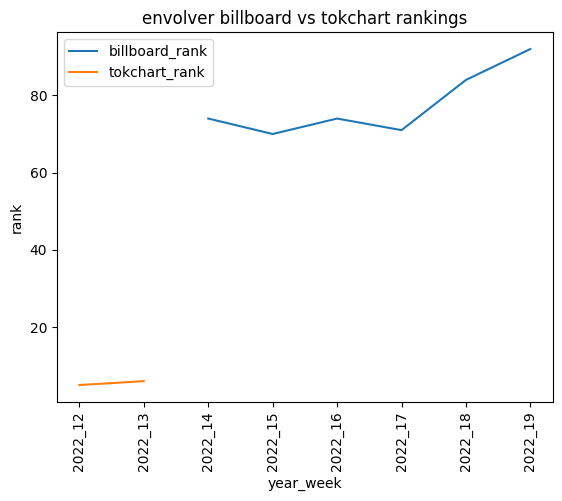

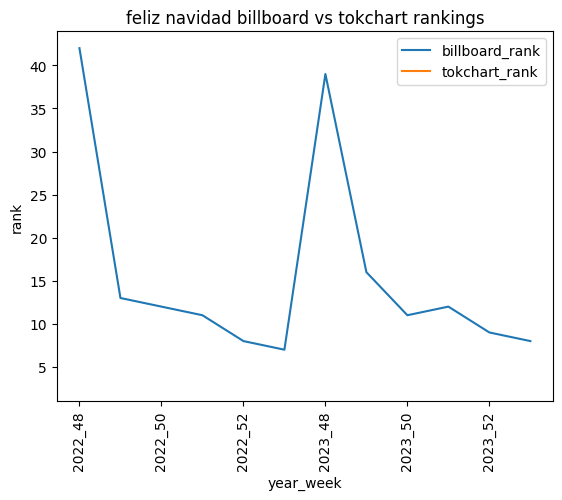

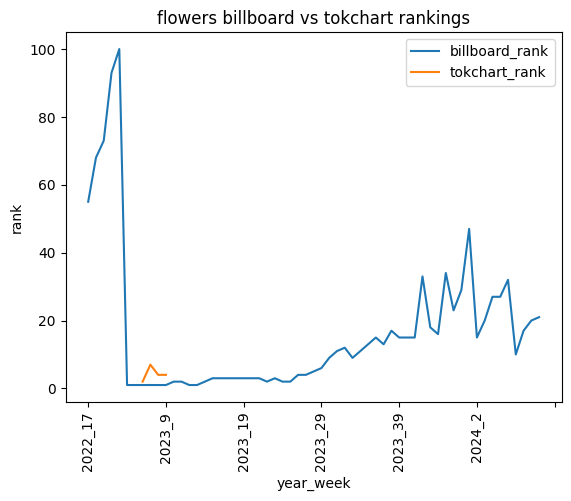

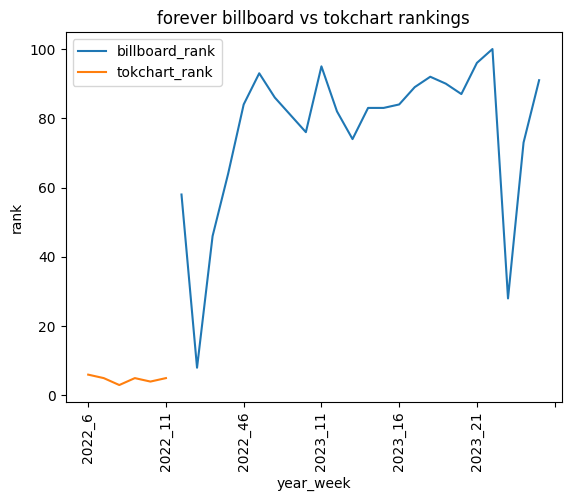

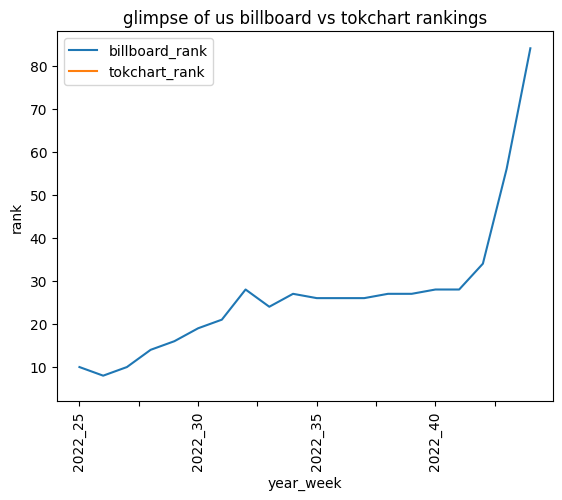

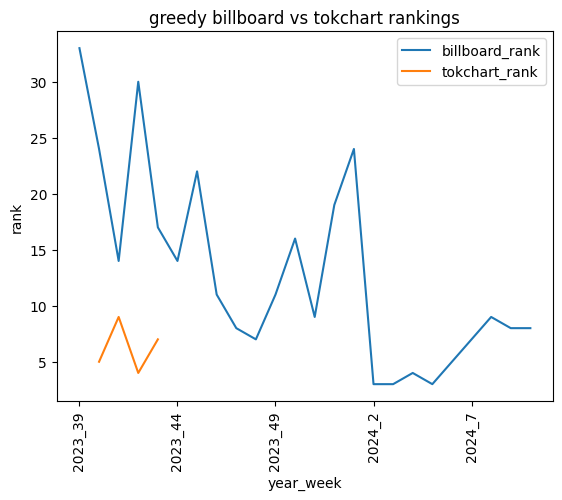

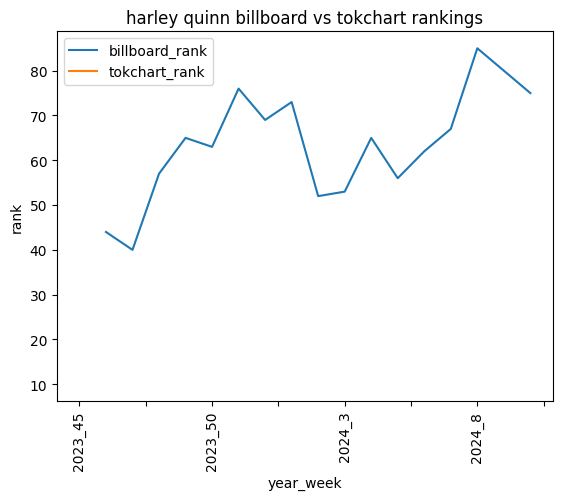

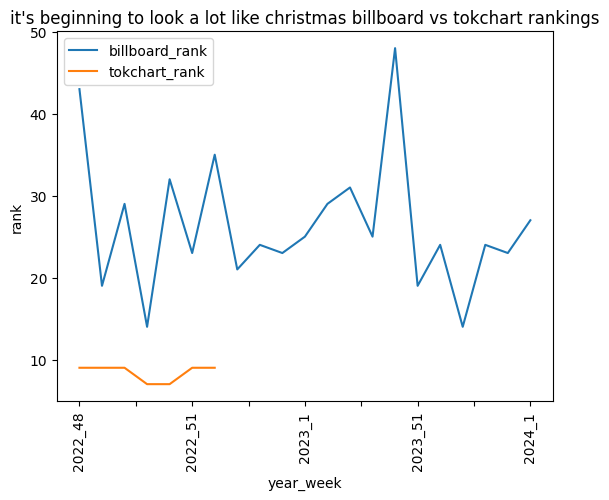

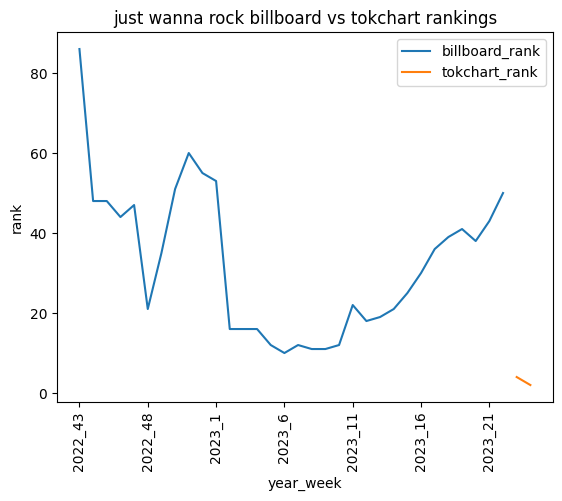

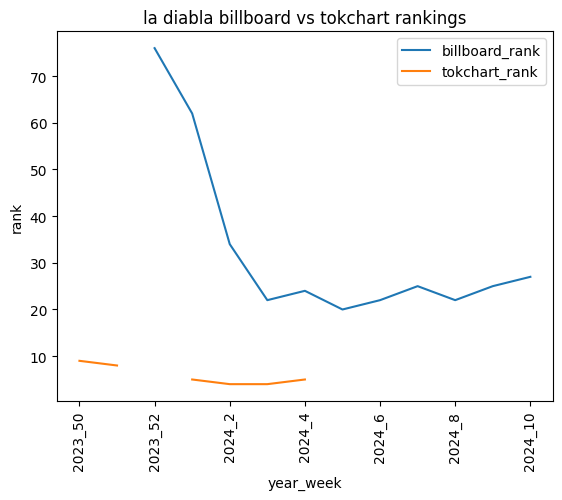

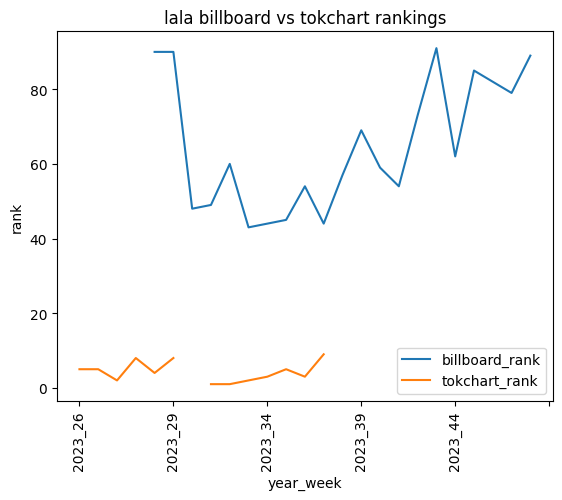

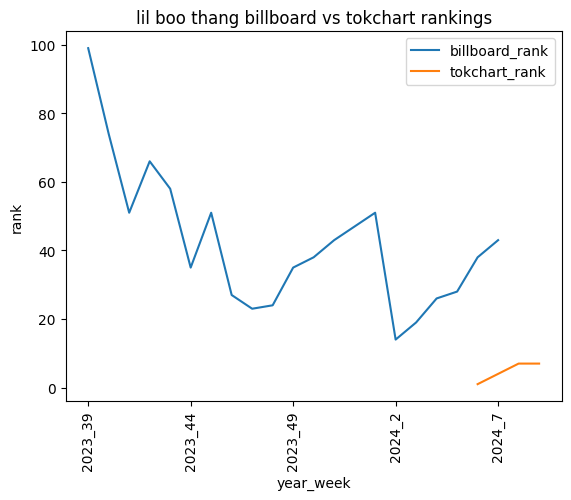

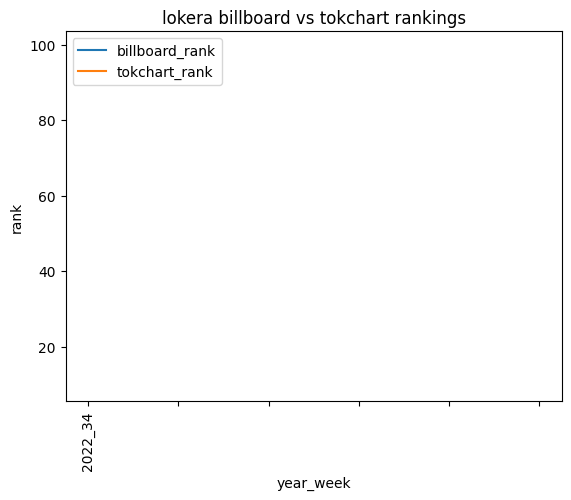

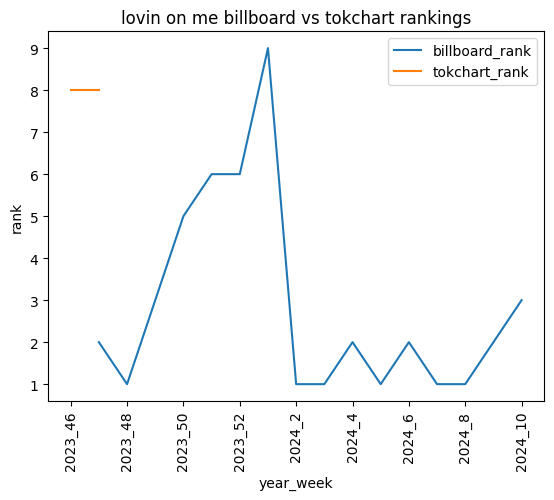

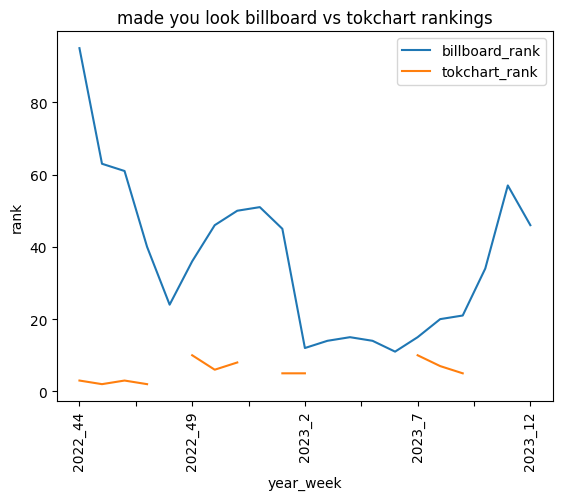

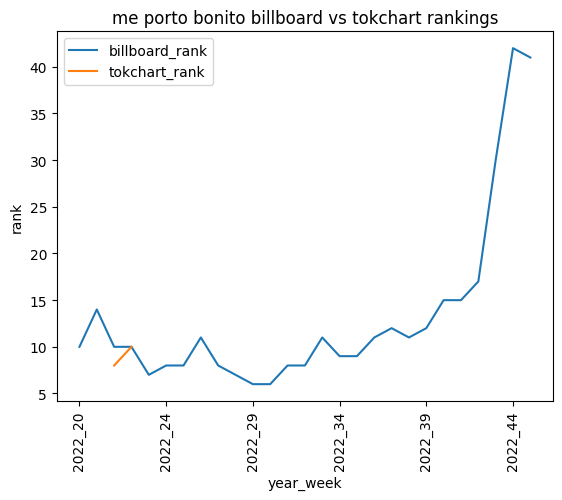

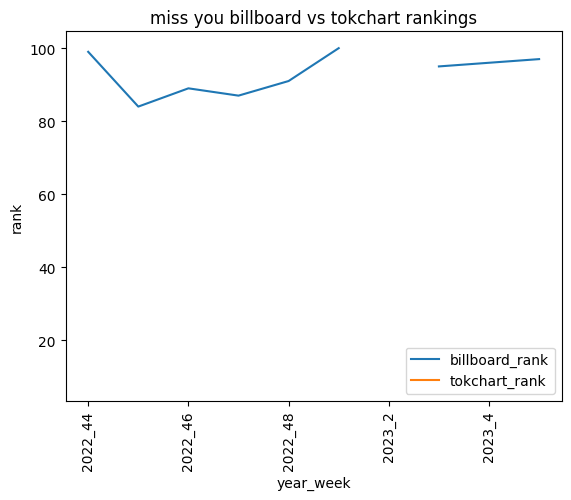

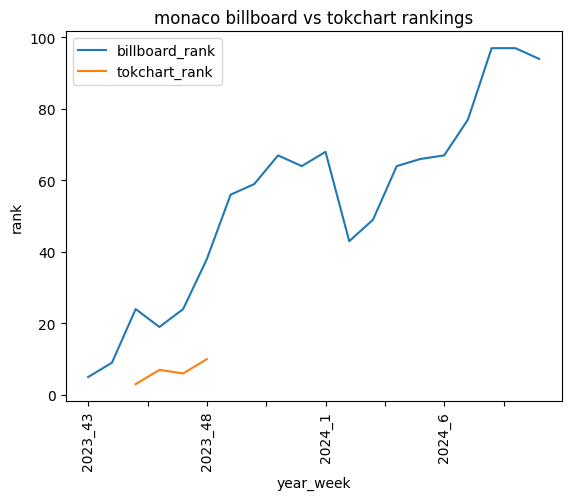

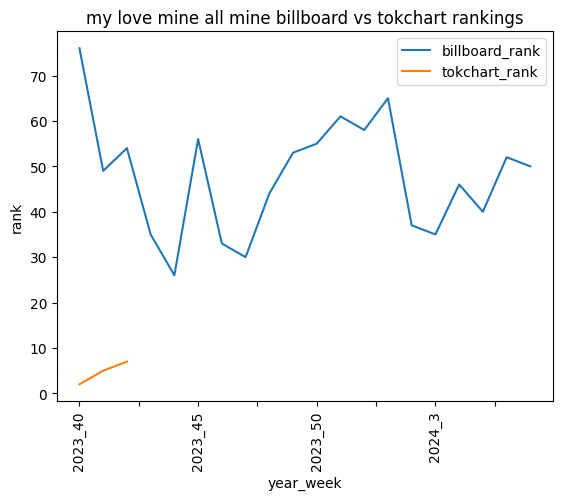

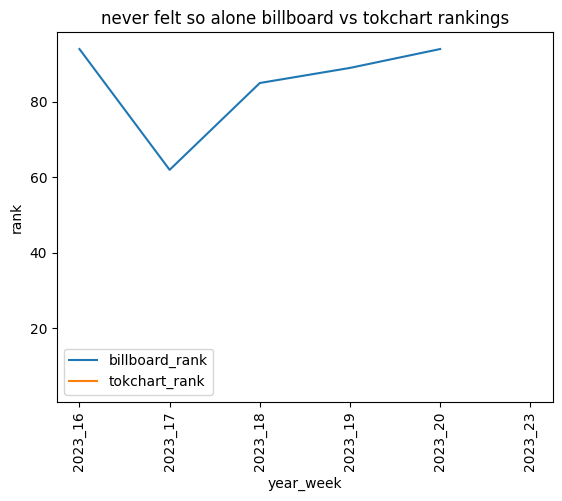

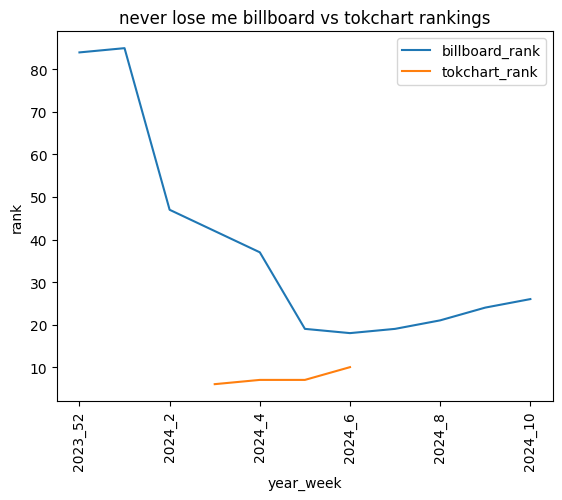

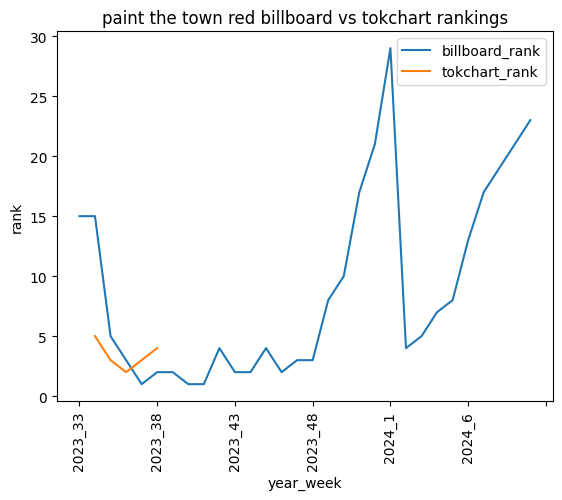

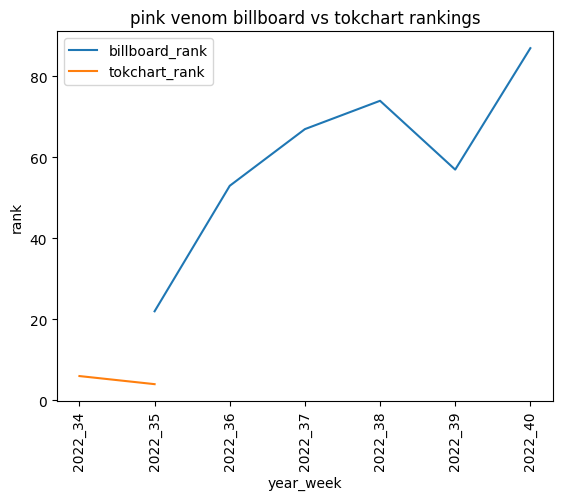

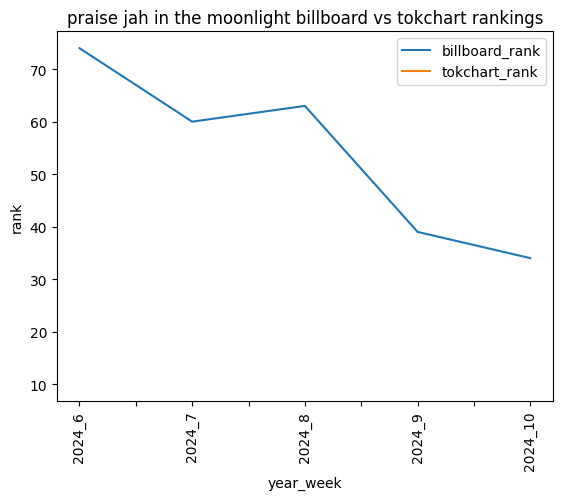

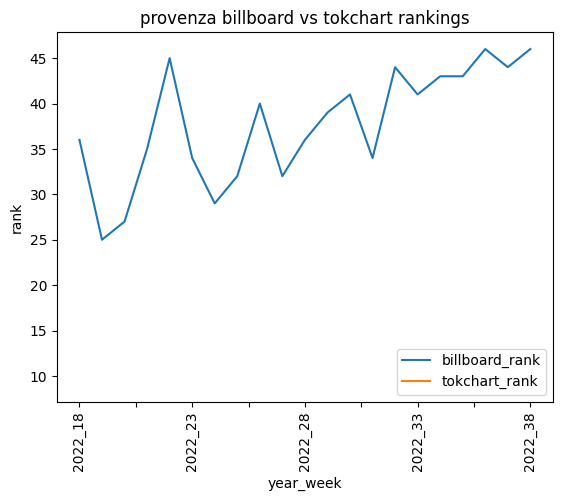

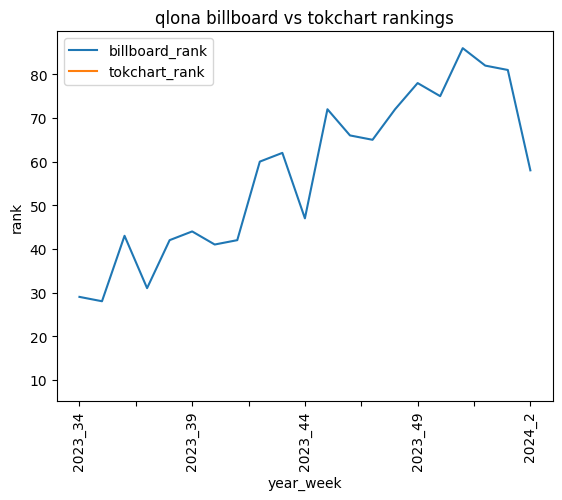

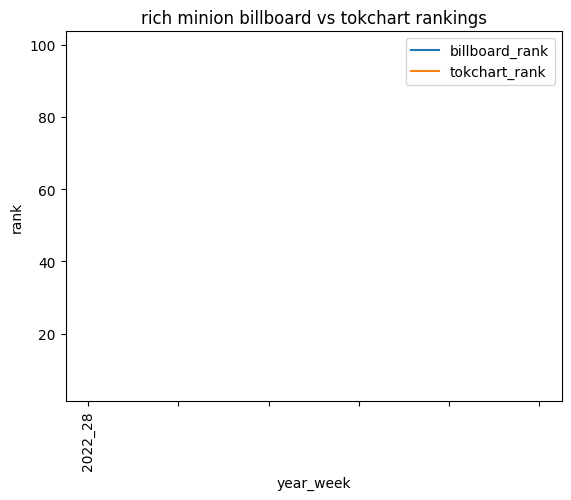

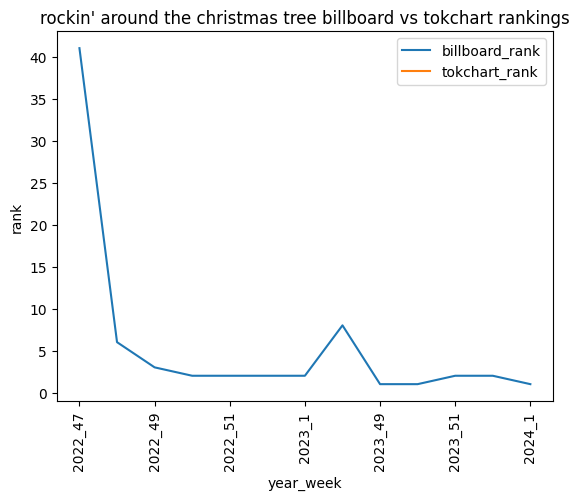

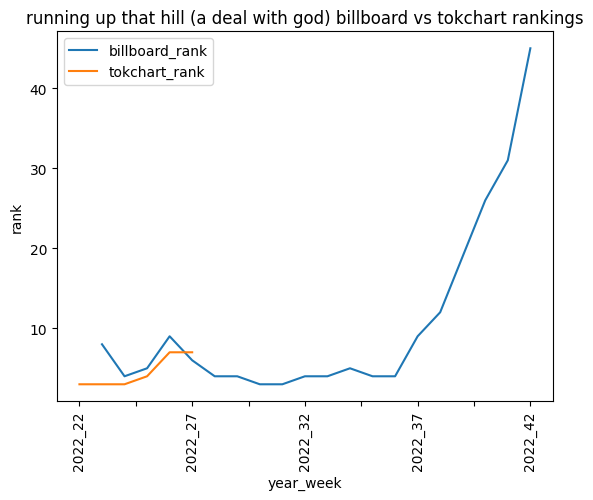

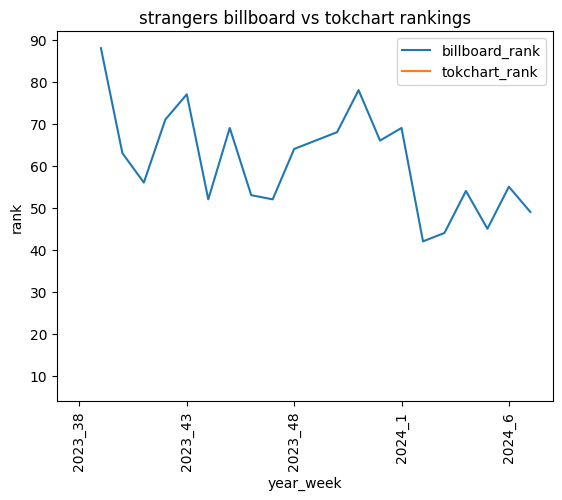

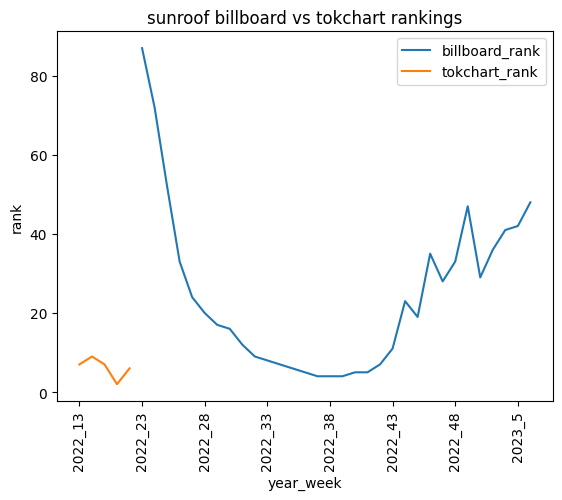

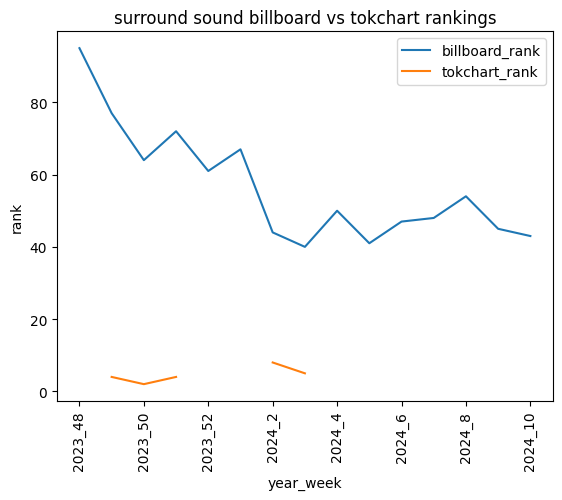

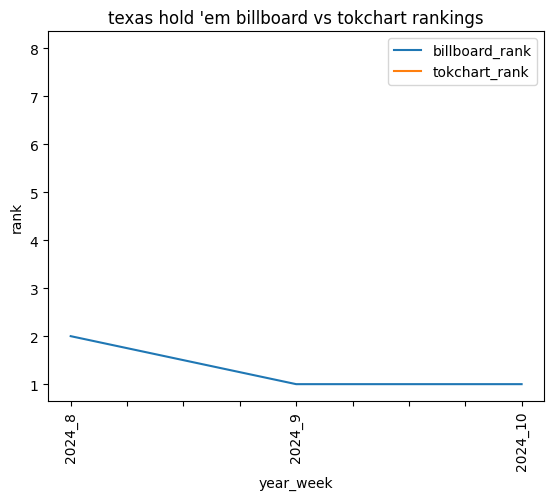

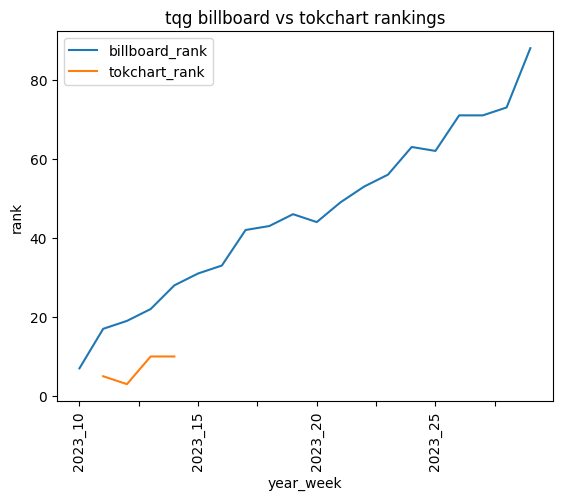

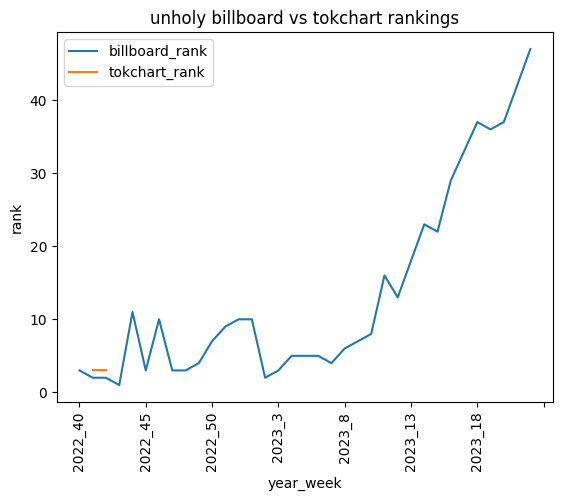

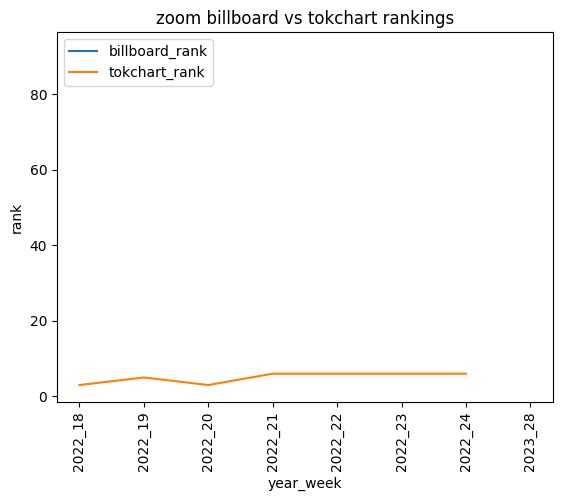

In [8]:
for song in intersecting_songs:
    billboard_song = billboard[billboard.get('song') == song]
    tokchart_song = tokchart[tokchart.get('song') == song]
    song_df = pd.merge(billboard_song, tokchart_song, how='outer', on=['year', 'week'])
    song_df = song_df.assign(year_week = song_df.get('year').astype(str) + '_' + song_df.get('week').astype(str),
                            tokchart_rank = song_df.get('rank_y'), billboard_rank = song_df.get('rank_x'))
    song_df.plot(kind='line', x='year_week', y=['billboard_rank', 'tokchart_rank'], title=f"{song} billboard vs tokchart rankings", ylabel='rank', rot=90)

# Analysis Type 1

In [9]:
billboard_avg_ranks = billboard.groupby('song').mean().get('rank')
tokchart_avg_ranks = tokchart.groupby('song').mean().get('rank')
df = pd.DataFrame().assign(billboard_avg_ranks = billboard_avg_ranks, tokchart_avg_ranks = tokchart_avg_ranks)
df

,billboard_avg_ranks,tokchart_avg_ranks
song,,
'98 braves,72.714286,NaN
'til you can't,32.476190,NaN
(there's no place like) home for the holidays (1954),50.000000,NaN
(there's no place like) home for the holidays (1959),41.000000,NaN
02.02.99,85.000000,NaN
...,...,...
you; me; & whiskey,67.562500,NaN
young harleezy,97.000000,NaN
your heart or mine,70.411765,NaN


In [10]:
corr = df.corr(method='spearman').get('tokchart_avg_ranks').iloc[0]
corr

0.2551402968961861

# Analysis Type 2

In [11]:
billboard = billboard.assign(year_month = billboard.get('year').astype(str) + '_' + billboard.get('month').astype(str))
tokchart = tokchart.assign(year_month = tokchart.get('year').astype(str) + '_' + tokchart.get('month').astype(str))
months = list(billboard.get('year_month').drop_duplicates())

In [12]:
df = pd.DataFrame(columns = ['corr'])
for month in months:
    bbd = billboard[billboard.get('year_month') == month].get(['song', 'rank'])
    tkct = tokchart[tokchart.get('year_month') == month].get(['song', 'rank'])
    month_df = pd.merge(bbd, tkct, how='outer', on='song')
    df.loc[month] = month_df.corr(method='spearman', numeric_only=True).get('rank_y').iloc[0]
df = df.reset_index()
df.columns = ['month', 'corr']
df

,month,corr
0,2022_2,NaN
1,2022_3,NaN
2,2022_4,0.473381
3,2022_5,0.201948
4,2022_6,0.260798
5,2022_7,NaN
6,2022_8,NaN
7,2022_9,0.625937
8,2022_10,0.347243
9,2022_11,-0.111139


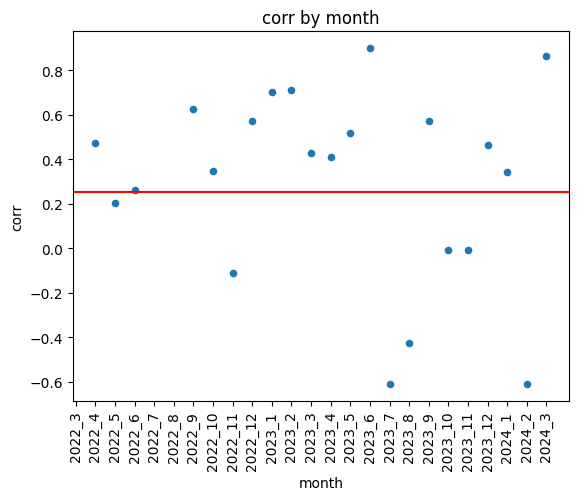

In [13]:
ax = df.plot(kind='scatter', x='month', y='corr', title='corr by month', rot=90)
ax.axhline(corr, c='r')